# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [79]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [86]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric' 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new albany
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | sorong
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | saint-denis
Processing Record 6 of Set 1 | laguna
Processing Record 7 of Set 1 | gornopravdinsk
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | bosaso
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | vanimo
Processing Record 12 of Set 1 | baherden
Processing Record 13 of Set 1 | oum hadjer
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | samusu
City not found. Skipping...
Processing Record 16 of Set 1 | maloy
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | chapais
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | mataura
Processing Re

Processing Record 38 of Set 4 | zarate
Processing Record 39 of Set 4 | warri
Processing Record 40 of Set 4 | duluth
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | barbar
City not found. Skipping...
Processing Record 43 of Set 4 | volosovo
Processing Record 44 of Set 4 | benghazi
Processing Record 45 of Set 4 | artyk
City not found. Skipping...
Processing Record 46 of Set 4 | thompson
Processing Record 47 of Set 4 | verkhnyaya inta
Processing Record 48 of Set 4 | tiverton
Processing Record 49 of Set 4 | mendahara
City not found. Skipping...
Processing Record 0 of Set 5 | yerbogachen
Processing Record 1 of Set 5 | sharjah
Processing Record 2 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | tukrah
Processing Record 5 of Set 5 | vostok
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | winnemucca
Processing Record 8 of Set 5 | lamar
Processing Record 9 of Set 5 | houma
P

Processing Record 28 of Set 8 | barroualie
City not found. Skipping...
Processing Record 29 of Set 8 | powell river
Processing Record 30 of Set 8 | saint anthony
Processing Record 31 of Set 8 | hailey
Processing Record 32 of Set 8 | asau
Processing Record 33 of Set 8 | minas
Processing Record 34 of Set 8 | bandarbeyla
Processing Record 35 of Set 8 | yanam
Processing Record 36 of Set 8 | dawei
Processing Record 37 of Set 8 | alofi
Processing Record 38 of Set 8 | meadow lake
Processing Record 39 of Set 8 | launceston
Processing Record 40 of Set 8 | husavik
Processing Record 41 of Set 8 | konstantinovka
Processing Record 42 of Set 8 | charkhari
Processing Record 43 of Set 8 | hinton
Processing Record 44 of Set 8 | kamaishi
Processing Record 45 of Set 8 | ugoofaaru
Processing Record 46 of Set 8 | hihifo
City not found. Skipping...
Processing Record 47 of Set 8 | acari
Processing Record 48 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 8 | nabire
Processing 

Processing Record 12 of Set 12 | san patricio
Processing Record 13 of Set 12 | changuinola
Processing Record 14 of Set 12 | hay river
Processing Record 15 of Set 12 | plateros
Processing Record 16 of Set 12 | mokhsogollokh
Processing Record 17 of Set 12 | port-gentil
Processing Record 18 of Set 12 | atbasar
Processing Record 19 of Set 12 | black diamond
Processing Record 20 of Set 12 | am timan
Processing Record 21 of Set 12 | abu kamal
Processing Record 22 of Set 12 | boa vista
Processing Record 23 of Set 12 | atasu
Processing Record 24 of Set 12 | cervo
Processing Record 25 of Set 12 | richards bay
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set 12 | qasigiannguit
Processing Record 28 of Set 12 | harper
Processing Record 29 of Set 12 | kendallville
Processing Record 30 of Set 12 | tessalit
Processing Record 31 of Set 12 | mildura
Processing Record 32 of Set 12 | kipushi
Processing Record 33 of Set 12 | sangar
Processing Record 34 of Set 12 | porbandar
Processing Rec

In [87]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [88]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new albany,38.2856,-85.8241,15.56,87,100,4.12,US,1675919051
1,souillac,-20.5167,57.5167,28.21,74,75,7.20,MU,1675919052
2,sorong,-0.8833,131.2500,26.53,82,100,2.37,ID,1675919053
3,hobart,-42.8794,147.3294,21.92,62,75,4.12,AU,1675918821
4,saint-denis,48.9167,2.3333,-1.03,79,0,1.03,FR,1675919055


In [89]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [90]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new albany,38.2856,-85.8241,15.56,87,100,4.12,US,1675919051
1,souillac,-20.5167,57.5167,28.21,74,75,7.20,MU,1675919052
2,sorong,-0.8833,131.2500,26.53,82,100,2.37,ID,1675919053
3,hobart,-42.8794,147.3294,21.92,62,75,4.12,AU,1675918821
4,saint-denis,48.9167,2.3333,-1.03,79,0,1.03,FR,1675919055


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

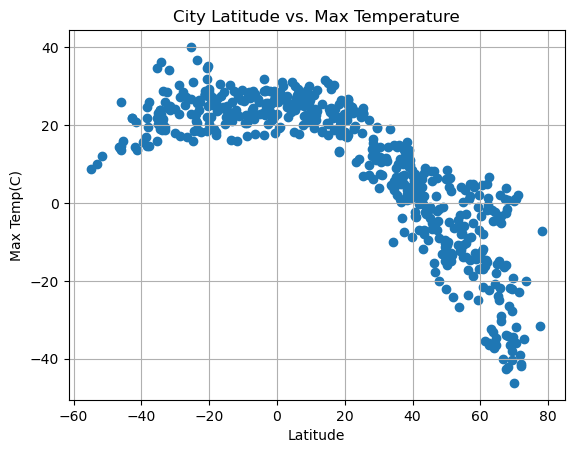

<Figure size 640x480 with 0 Axes>

In [134]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/CitLatvTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

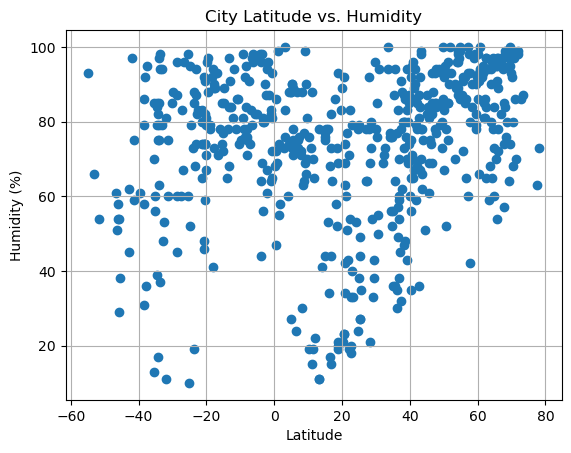

<Figure size 640x480 with 0 Axes>

In [135]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/CitLatvHum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

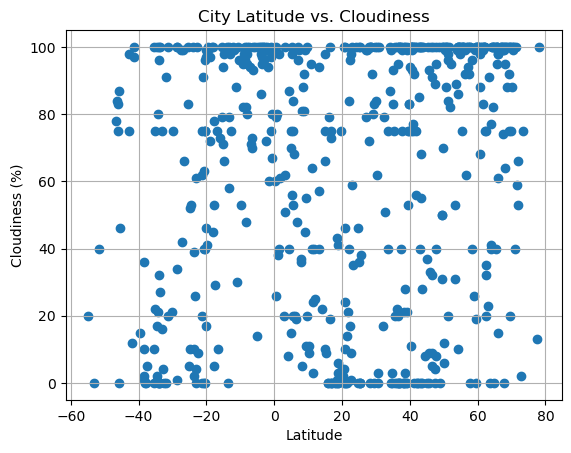

<Figure size 640x480 with 0 Axes>

In [136]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/CitLatvCld.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

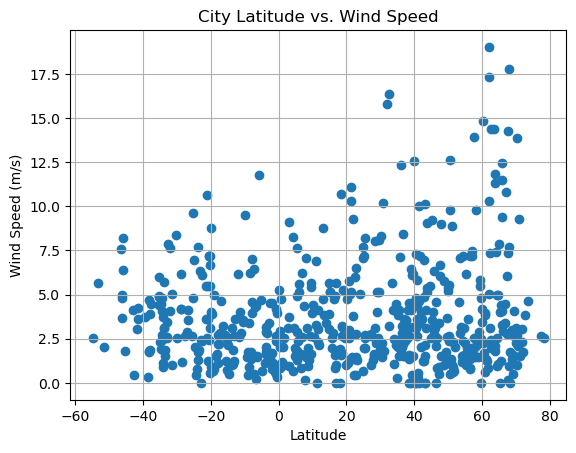

<Figure size 640x480 with 0 Axes>

In [137]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/CitLatvWnd.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [123]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [124]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new albany,38.2856,-85.8241,15.56,87,100,4.12,US,1675919051
4,saint-denis,48.9167,2.3333,-1.03,79,0,1.03,FR,1675919055
5,laguna,38.4210,-121.4238,11.76,80,0,0.00,US,1675919055
6,gornopravdinsk,60.0500,69.9000,-14.03,98,100,3.44,RU,1675919056
8,bosaso,11.2842,49.1816,23.99,88,40,0.00,SO,1675919057


In [125]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,souillac,-20.5167,57.5167,28.21,74,75,7.20,MU,1675919052
2,sorong,-0.8833,131.2500,26.53,82,100,2.37,ID,1675919053
3,hobart,-42.8794,147.3294,21.92,62,75,4.12,AU,1675918821
7,faanui,-16.4833,-151.7500,27.43,71,10,3.24,PF,1675919057
9,avarua,-21.2078,-159.7750,28.03,74,20,3.60,CK,1675919058


###  Temperature vs. Latitude Linear Regression Plot

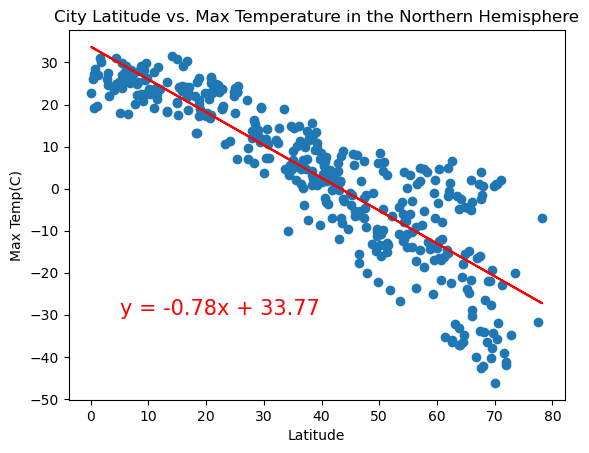

In [126]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.title('City Latitude vs. Max Temperature in the Northern Hemisphere')

plt.savefig("../output_data/NorHemiTempvLat.png")

# Show plot
plt.show()

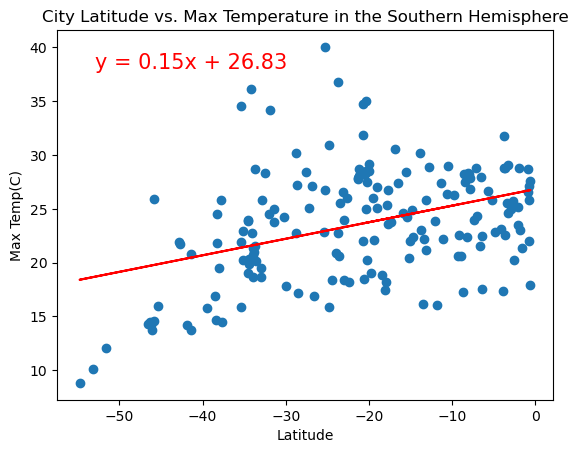

In [127]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,38),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.title('City Latitude vs. Max Temperature in the Southern Hemisphere')

plt.savefig("../output_data/SudHemiTempvLat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** We can see that, on average, as we near the equator, the temperature rises.

### Humidity vs. Latitude Linear Regression Plot

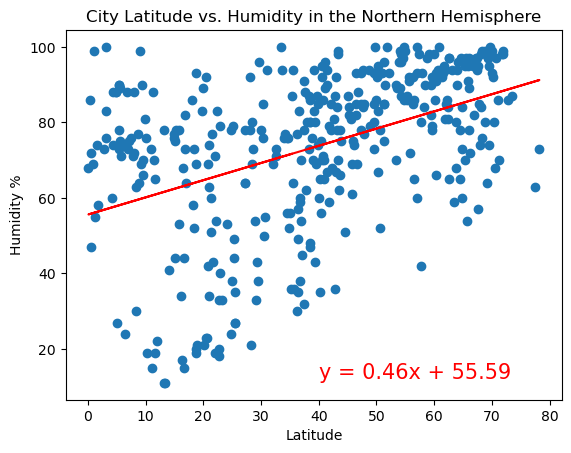

In [128]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity in the Northern Hemisphere')

plt.savefig("../output_data/NorHemiHumvLat.png")

# Show plot
plt.show()

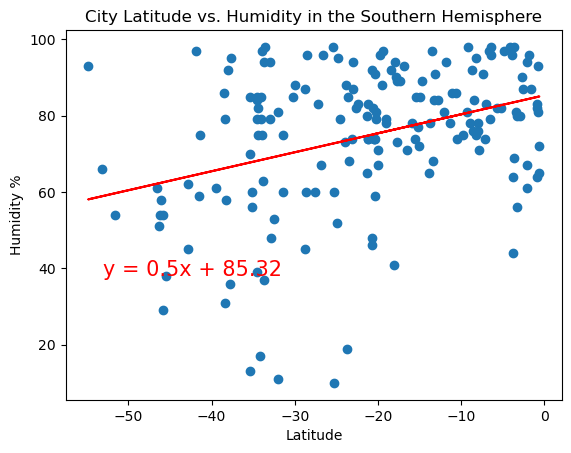

In [129]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,38),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity in the Southern Hemisphere')

plt.savefig("../output_data/SudHemiHumvLat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** From the graph, as we head more north, the humidity rises, however all results are incredibly varied, and this is likely due more to environmental conditions than longitudinal positioning.

### Cloudiness vs. Latitude Linear Regression Plot

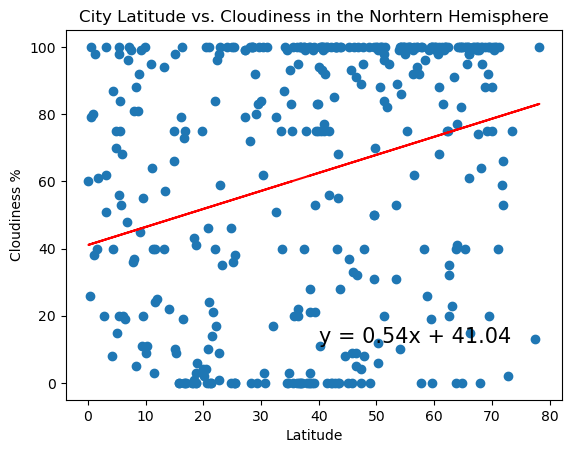

In [130]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness in the Norhtern Hemisphere')

plt.savefig("../output_data/NorHemiCldvLat.png")

# Show plot
plt.show()

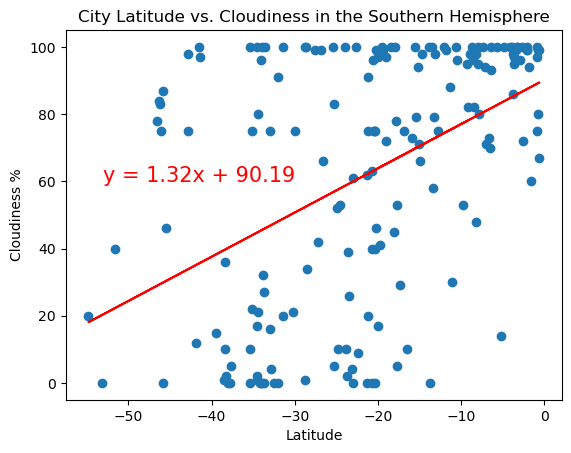

In [131]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness in the Southern Hemisphere')

plt.savefig("../output_data/SudHemiCldvLat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Like humidity, the further north we go, the higher a chance of cloudiness, however also like humidity, there are huge extremes and compparing against latitude may not be the best choice here.

### Wind Speed vs. Latitude Linear Regression Plot

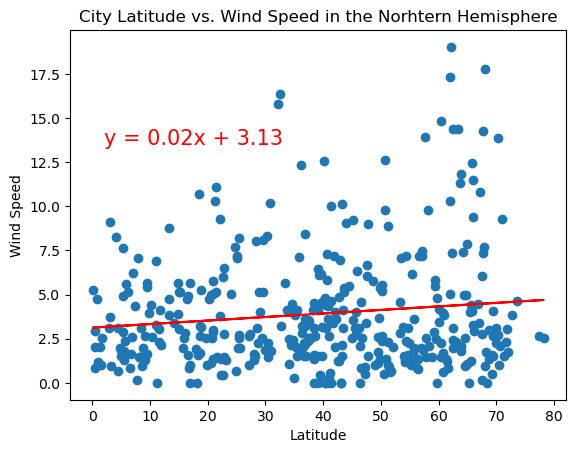

In [132]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,13.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed in the Norhtern Hemisphere')

plt.savefig("../output_data/NorHemiWndvLat.png")

# Show plot
plt.show()

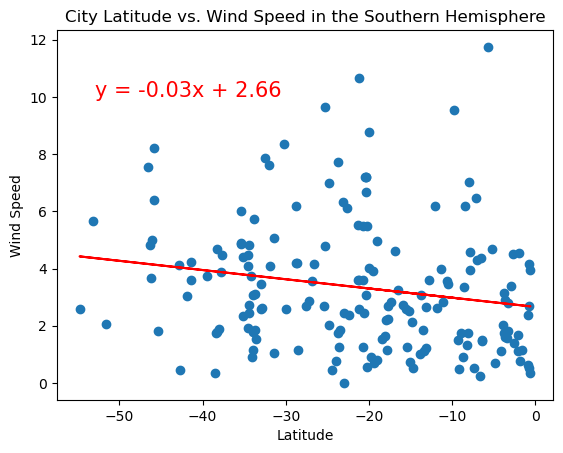

In [133]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed in the Southern Hemisphere')

plt.savefig("../output_data/SudHemiWndvLat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** We see similar rises in both hemispheres in wind speed as we approach the equator with many of the most extreme winds near the equator. This likely indicates tropic conditions may be contributing to higher wind speeds.